In [ ]:
"""
Problem Type: Multi-class classification
Image size:   28x28
Samples:      60000
Multi-Layer Perceptron(MLP) Configuration:
     Number of Layers:                      2
     Number of nodes in input layer:        28x28 = 784
     Number of nodes in output layer:       10
     Activation function:                   Relu and Softmax(Output layer)
     Number of epochs:                      10
     Batch Size:                            200
"""
     

Using TensorFlow backend.


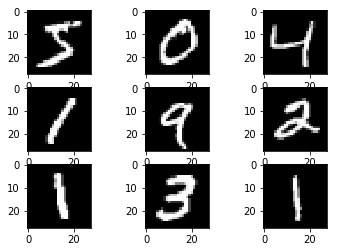

In [1]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(331 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [2]:
#MLP
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define model
def MLP_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = MLP_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("MLP Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1413 - val_acc: 0.9572
Epoch 2/10
7s - loss: 0.1115 - acc: 0.9677 - val_loss: 0.0920 - val_acc: 0.9708
Epoch 3/10
7s - loss: 0.0716 - acc: 0.9798 - val_loss: 0.0790 - val_acc: 0.9764
Epoch 4/10
7s - loss: 0.0502 - acc: 0.9858 - val_loss: 0.0743 - val_acc: 0.9770
Epoch 5/10
7s - loss: 0.0372 - acc: 0.9894 - val_loss: 0.0672 - val_acc: 0.9793
Epoch 6/10
7s - loss: 0.0267 - acc: 0.9927 - val_loss: 0.0635 - val_acc: 0.9804
Epoch 7/10
7s - loss: 0.0210 - acc: 0.9946 - val_loss: 0.0619 - val_acc: 0.9812
Epoch 8/10
7s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0646 - val_acc: 0.9801
Epoch 9/10
7s - loss: 0.0107 - acc: 0.9979 - val_loss: 0.0594 - val_acc: 0.9816
Epoch 10/10
7s - loss: 0.0078 - acc: 0.9985 - val_loss: 0.0583 - val_acc: 0.9817
MLP Error: 1.83%


In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


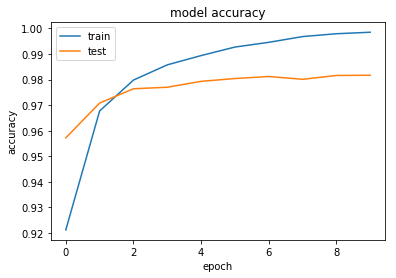

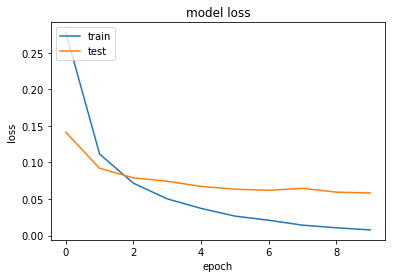

In [5]:
from matplotlib import pyplot as plt
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()